# Задание

Каждая задача предполагает использование набора данных. Набор данных выбирается Вами произвольно с учетом следующих условий:

* Вы можете использовать один набор данных для решения всех задач, или решать каждую задачу на своем наборе данных.
* Набор данных должен отличаться от набора данных, который использовался в лекции для решения рассматриваемой задачи.
* Вы можете выбрать произвольный набор данных (например тот, который Вы использовали в лабораторных работах) или создать собственный набор данных (что актуально для некоторых задач, например, для задач удаления псевдоконстантных или повторяющихся признаков).
* Выбранный или созданный Вами набор данных должен удовлетворять условиям поставленной задачи. Например, если решается задача устранения пропусков, то набор данных должен содержать пропуски.

## Задача 1

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

## Задача 2

Для набора данных проведите удаление повторяющихся признаков.

# Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import MissingIndicator, SimpleImputer
import seaborn as sns

In [2]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

# Загружаем набор данных

In [3]:
data = pd.read_csv('airport.csv')
data

,id str,ident str,type str,name str,latitude_deg float,longitude_deg float,elevation_ft int,continent str,iso_country str,iso_region str,municipality str,scheduled_service str,gps_code str,iata_code str,local_code str,home_link str,wikipedia_link str,keywords str
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55095,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,NaN,https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...,NaN
55096,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,NaN,NaN,NaN
55097,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,http://en.wikipedia.org/wiki/Principality_of_S...,Roughs Tower Helipad
55098,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN


В качестве исходных данных был выбран набор данных аэропорта. Набор данных содержит пропуски в некоторых категориальных колонках. Убедимся в этом.

In [4]:
# Колонки с пропусками
data_na = [c for c in data.columns if data[c].isnull().sum() > 0]
data_na

['elevation_ft int',
 'continent str',
 'iso_country str',
 'municipality str',
 'gps_code str',
 'iata_code str',
 'local_code str',
 'home_link str',
 'wikipedia_link str',
 'keywords str']

In [5]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data_na]

[('elevation_ft int', 0.12548094373865698),
 ('continent str', 0.5038112522686026),
 ('iso_country str', 0.004482758620689655),
 ('municipality str', 0.10266787658802178),
 ('gps_code str', 0.255989110707804),
 ('iata_code str', 0.8333756805807623),
 ('local_code str', 0.47778584392014517),
 ('home_link str', 0.9454990925589837),
 ('wikipedia_link str', 0.8212704174228675),
 ('keywords str', 0.8294918330308529)]

# Задание 1

Для устранения пропусков наиболее распространенным значением выберем категориальный признак аббривеатуры континента "continent str". Данные этого признака не являются главной информацией о полете и контенентов не так много, поэтому большиство стран находятся на одном континенте.

In [6]:
column_for_fill=['continent str']
changed_data_1 = data[column_for_fill].copy()

In [7]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

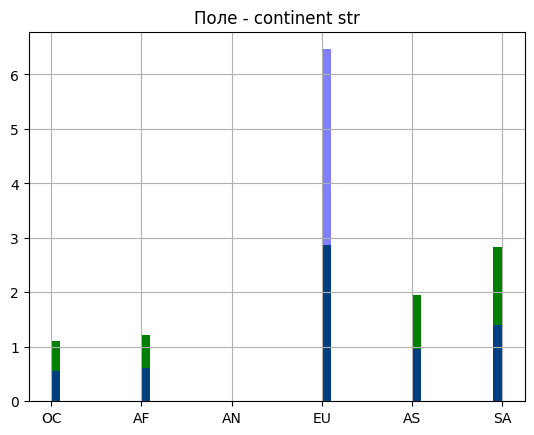

In [8]:
elevation_ft_cat_new, _, _ = impute_column(changed_data_1, 'continent str', 'most_frequent')
changed_data_1['continent str'] = elevation_ft_cat_new
plot_hist_diff(data, changed_data_1, column_for_fill)

# Задание 2

При визуализации части данных набора в начале первого задания была заметна схожесть значений признаков "gps_code str" и "local_code str". Проверим, насколько они отличаются.

In [ ]:
gps_col= data['gps_code str'].copy()
local_code = data['local_code str'].copy()

In [ ]:
mismatch = 0
for i in range(len(data)):
    if (gps_col[i] != local_code[i]):
        mismatch=mismatch+1
1-mismatch/len(data)

0.6993647912885663

Мы видим, что  значения столбцов совпадают на 70 процентов. Причем 26% всех записей признака "gps_code str" просто пропущены. Скорее всенго именно поэтому несовпадение по столбцам около 30%. Эти наблюдения позволяют принять решение об удалении столбца "gps_code str".

In [ ]:
changed_data_2 = data.drop(['local_code str'], axis=1)
changed_data_2

,id str,ident str,type str,name str,latitude_deg float,longitude_deg float,elevation_ft int,continent str,iso_country str,iso_region str,municipality str,scheduled_service str,iata_code str,local_code str,home_link str,wikipedia_link str,keywords str
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55095,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,YKH,NaN,NaN,https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...,NaN
55096,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,NaN,NaN,NaN,NaN,NaN
55097,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,http://www.sealandgov.org/,http://en.wikipedia.org/wiki/Principality_of_S...,Roughs Tower Helipad
55098,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN
